# 1. Titanic Project
## Problem Statement:
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import shapiro
from scipy.stats import randint

from imblearn.over_sampling import SMOTE


import warnings
warnings.filterwarnings('ignore')

#### Import the dataset titanic_train

In [2]:
data = pd.read_csv(r"C:\Users\dell\Desktop\Data Trained Projects\Project 3\titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

##### Observations:
1. This shows that the dataset is imported successfully.
2. The train data consists of 891 training examples with 12 features.

### Let's check the statistical discription of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Observation:
1. Columns contains 5 integer type variables, 2 float type variables and 5 object type variables
2. 3 Columns are incomplete

### Let's check columns having null values

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### In this section we are going to explore and analyze the numerical features. So let's get start with the statistical information of the data.

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Preprocessing

As, the dataset is not cleaned, we will treat the dataset so that -
1. All the null values or the missing values will be filled using mean, median or mode
2. Drop all the unwanted columns which have nothing to do or have minimum relation with the survived column
3. Change/replace the categorical values with numbers

In [7]:
def data_pipeline(data):
    data["Age"].fillna((data["Age"].mean()), inplace=True)
    data = data.drop(["Name", "Ticket"], axis=1)
    data.Sex.replace(to_replace=dict(female=1, male=0), inplace=True)
    data.Embarked.replace(to_replace=dict(Q=1, C=2, S=3), inplace=True)
    data["Embarked"].fillna((data["Embarked"].mean()), inplace=True)
    data['Deck'] = data['Cabin'].str.extract('([A-Za-z])', expand=False)
    data.Deck.replace(to_replace=dict(A=1, B=2, C=3, D=4, E=5, F=6, G=7, T=8), inplace=True)
    data["Deck"].fillna((data["Deck"].median()), inplace=True)
    data = data.drop(["Cabin"], axis=1)
    data["Fare"].fillna((data["Fare"].mean()), inplace=True)
    
    return data

In [8]:
data = data_pipeline(data)

In [9]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,1,0,3,0,22.000000,1,0,7.2500,3.0,3.0
1,2,1,1,1,38.000000,1,0,71.2833,2.0,3.0
2,3,1,3,1,26.000000,0,0,7.9250,3.0,3.0
3,4,1,1,1,35.000000,1,0,53.1000,3.0,3.0
4,5,0,3,0,35.000000,0,0,8.0500,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,3.0,3.0
887,888,1,1,1,19.000000,0,0,30.0000,3.0,2.0
888,889,0,3,1,29.699118,1,2,23.4500,3.0,3.0
889,890,1,1,0,26.000000,0,0,30.0000,2.0,3.0


Finally, we got a clean dataset with no missing values, or with unwanted columns and the categorical data is converted into number codes

# Data Interpretation and Visualization

### Outlier Visualization, Interpretation and Handling

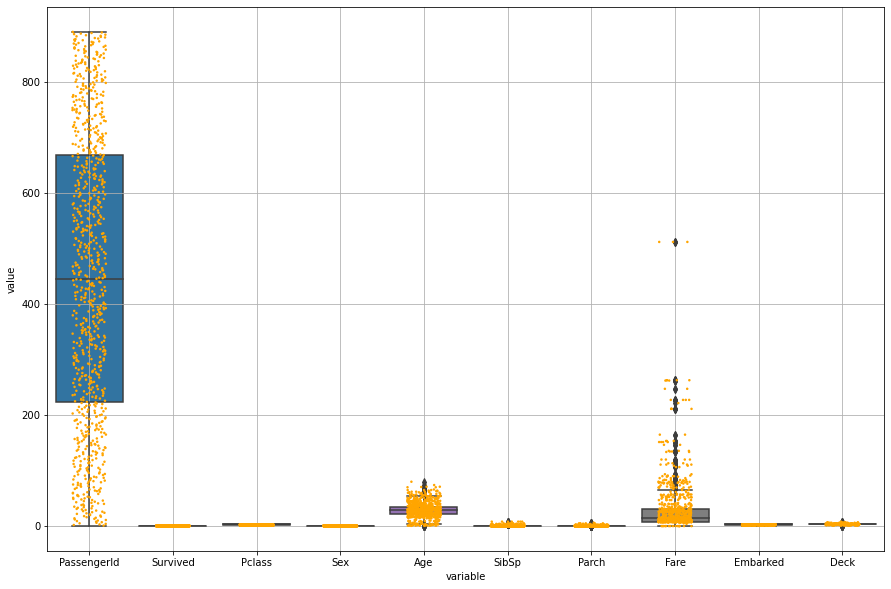

In [10]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(data))
sns.stripplot(x="variable", y="value", data=pd.melt(data), color="orange", jitter=0.2, size=2.5)
plt.grid()

Here, by using boxplot, we can visualize that some columns having outliers
and scatter plots shows the values

#### Lets use distplot
which Flexibly plot a univariate distribution of observations.

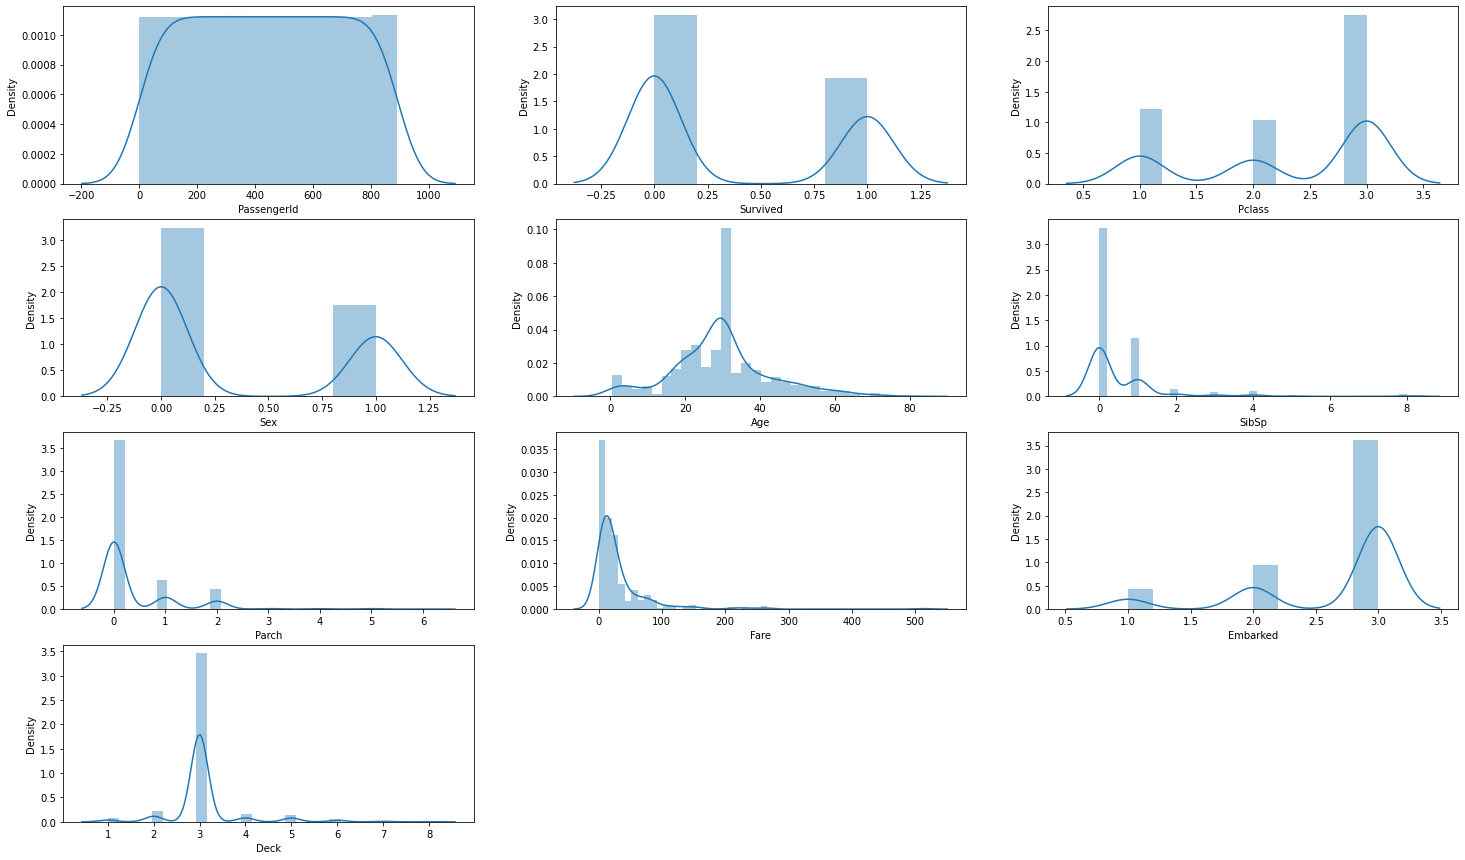

In [11]:
a=1
plt.figure(figsize=(25, 15))
for i in data.columns:
    plt.subplot(4, 3, a)
    sns.distplot(data[i])
    a += 1
plt.show()

#### Hypothesis 1: Not one of the columns are normal distriuted

This will be evaluated by using the p-value measurement:

${\displaystyle p=2\min\{\Pr(T\geq t\mid H_{0}),\Pr(T\leq t\mid H_{0})\}}$ for a two-sided test. If distribution ${\displaystyle T}$ is symmetric about zero, then ${\displaystyle p=\Pr(|T|\geq |t|\mid H_{0})}{\displaystyle p=\Pr(|T|\geq |t|\mid H_{0})}$

In [12]:
# Shapiro-Wilk Test
for col in data:
    stat, p = shapiro(data[col])
    print("----------------------------------------------")
    print(col)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

----------------------------------------------
PassengerId
Statistics=0.955, p=0.000
Sample does not look Gaussian (reject H0)
----------------------------------------------
Survived
Statistics=0.617, p=0.000
Sample does not look Gaussian (reject H0)
----------------------------------------------
Pclass
Statistics=0.718, p=0.000
Sample does not look Gaussian (reject H0)
----------------------------------------------
Sex
Statistics=0.604, p=0.000
Sample does not look Gaussian (reject H0)
----------------------------------------------
Age
Statistics=0.959, p=0.000
Sample does not look Gaussian (reject H0)
----------------------------------------------
SibSp
Statistics=0.513, p=0.000
Sample does not look Gaussian (reject H0)
----------------------------------------------
Parch
Statistics=0.533, p=0.000
Sample does not look Gaussian (reject H0)
----------------------------------------------
Fare
Statistics=0.522, p=0.000
Sample does not look Gaussian (reject H0)
---------------------------

#### On the basis of the knowledge gained from above the data in columns are not normal distributed.

### Outlier handling
We do not handle any outliers for the following reason:
- a woman, with age 70 in the 3rd class has it a lot harder than a man, with 30 ages and in the 1st class

This statement will be proven in the section visualizations...

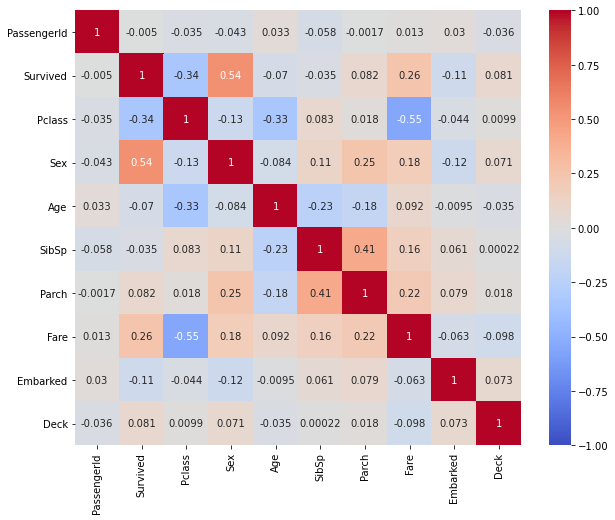

In [13]:
# Visualize correlations of each column (not necessary but for interest)
correlations = data.corr(method="pearson")
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, vmin= -1, cmap="coolwarm", annot=True)
plt.show()

### Visualization

#### More Men than Women died:

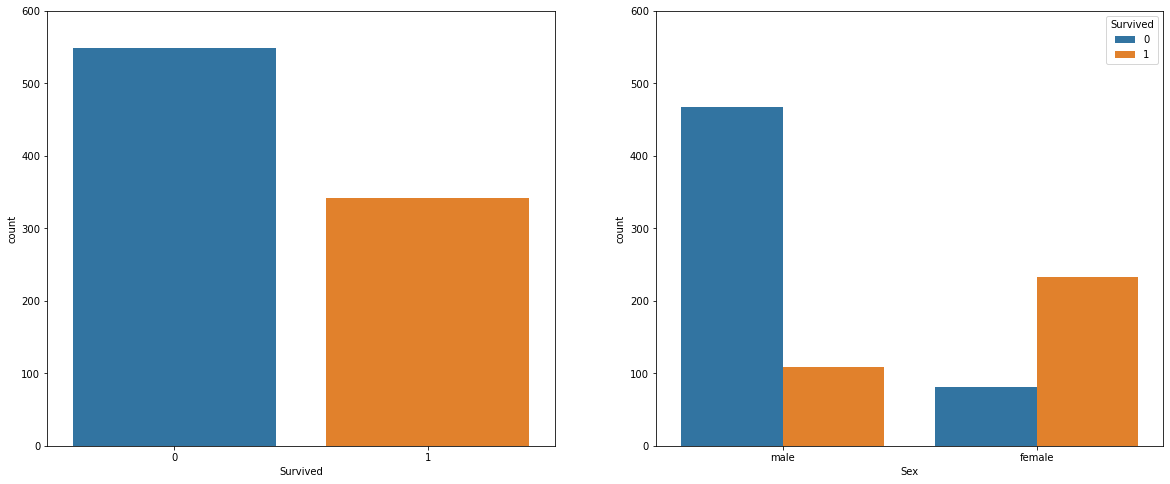

In [14]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.ylim(0, 600)
sns.countplot(data=data, x="Survived")


plt.subplot(1, 2, 2)
fig_2 = sns.countplot(data=data, x="Sex", hue="Survived")
fig_2.set_xticklabels(["male", "female"])
plt.ylim(0, 600)
plt.show(fig_2.containers[0])
plt.show(fig_2.containers[1])

plt.show()

#### Persons which are in the Age Group 30 are died the most but not in percentage:

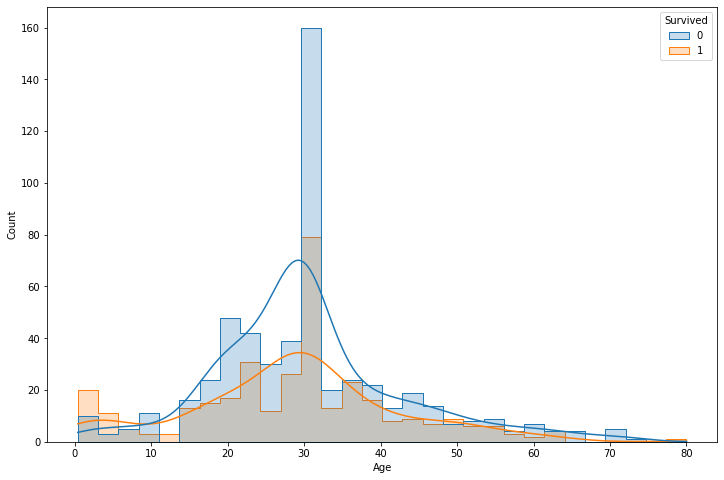

In [15]:
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x="Age", hue="Survived", element="step", kde=True)
plt.show()

#### According to the Classes 1-3 (1 = 1st class (best class) -> upper levels of the ship, 2 = 2nd class -> middle level of the ship, 3 = 3rd class -> lower levels of the ship) this means that passengers in the 3rd class had it harder to get on top than 1st class passengers:

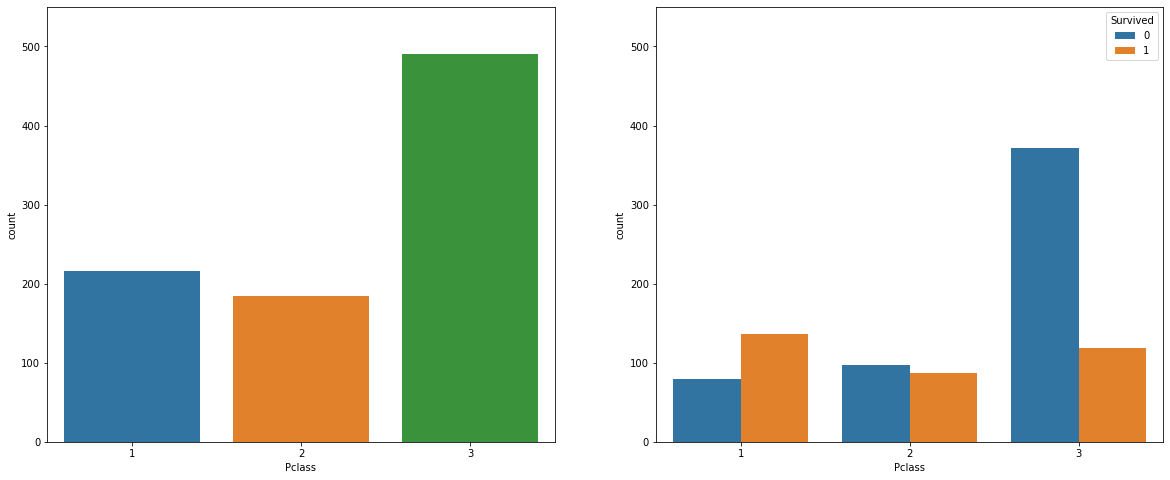

In [16]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.ylim(0, 550)
fig_2 = sns.countplot(data=data, x="Pclass")
plt.subplot(1, 2, 2)
fig_2 = sns.countplot(data=data, x="Pclass", hue="Survived")
fig_2.set_xticklabels(["1", "2", "3"])
plt.ylim(0, 550)
plt.show(fig_2.containers[0])
plt.show(fig_2.containers[1])

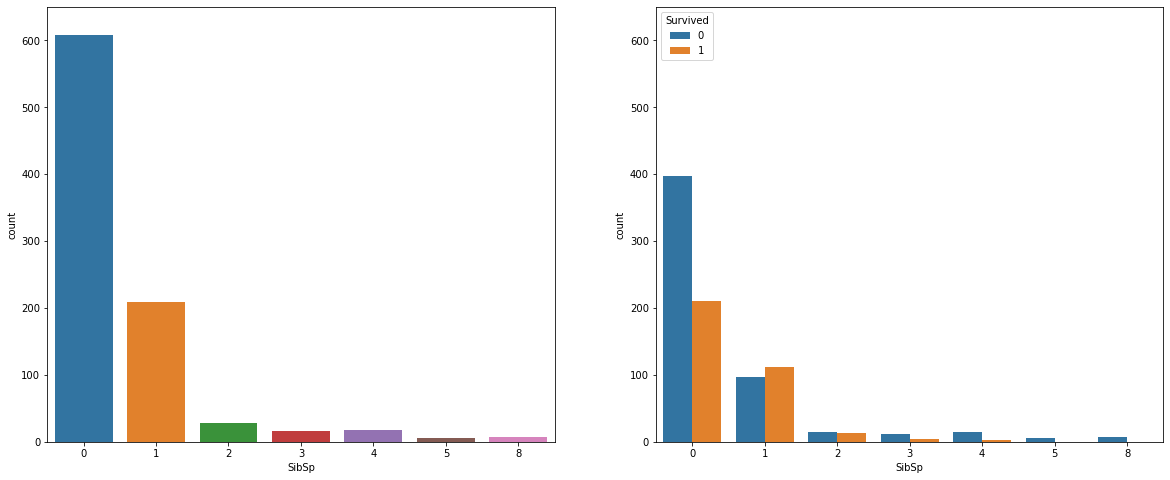

In [17]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.ylim(0, 650)
sns.countplot(data=data, x="SibSp")


plt.subplot(1, 2, 2)
fig_4 = sns.countplot(data=data, x="SibSp", hue="Survived")
plt.ylim(0, 650)
plt.show(fig_4.containers[0])
plt.show(fig_4.containers[1])


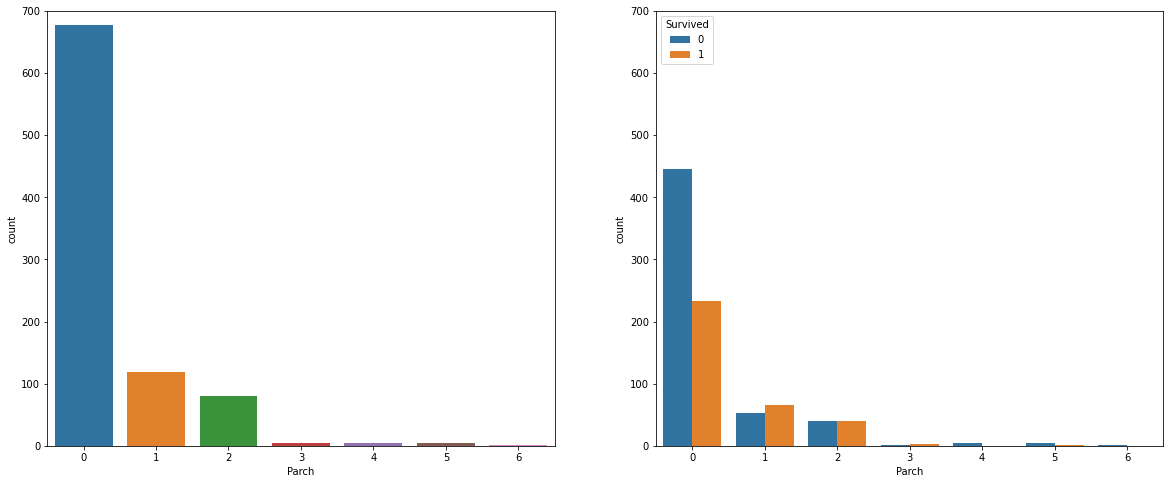

In [18]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.ylim(0, 700)
sns.countplot(data=data, x="Parch")


plt.subplot(1, 2, 2)
fig_4 = sns.countplot(data=data, x="Parch", hue="Survived")
plt.ylim(0, 700)
plt.show(fig_4.containers[0])
plt.show(fig_4.containers[1])


# Preprocessing and Classification

#### First of all we split the Survived column from the other columns and use SMOTE to make the "Survived" column distribution equal

In [19]:
x = data.drop(columns=["Survived"])
y = data["Survived"]

# Show distribution of 0 and 1
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [20]:
sm = SMOTE(random_state=42)
x, y = sm.fit_resample(x, y)
y.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [21]:
# Split train and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=14)

### Prepare the models for testing

In [22]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

# Create empty list and append each model to list
models = []
models.append(("SVC", SVC(random_state=14)))
models.append(("SVM", LinearSVC(random_state=14)))
models.append(("LOGR", LogisticRegression(solver="liblinear", random_state=14)))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier(random_state=14)))
models.append(("NB", GaussianNB()))
models.append(("DT", DecisionTreeClassifier(random_state=14)))
models.append(("RF", RandomForestClassifier(random_state=14)))
models.append(("ET", ExtraTreesClassifier(random_state=14)))
models.append(("GB", GradientBoostingClassifier(random_state=14)))
models.append(("BC", BaggingClassifier(random_state=14)))

# Empty list for results of the evaluation
model_results = []

In [23]:
# Function: for each element in model list there will be an evaluation -> Results will be added to results df
def train_all_models(models):
    i = 1
    plt.figure(figsize=(25, 15))
    for method, model in models:
        model.fit(x_train, y_train)
        test_pred = model.predict(x_test)

        f_score = model.score(x_test, y_test)
        model_results.append((method, f_score))

        plt.subplot(3, 4, i)
        plt.subplots_adjust(hspace=0.3, wspace=0.3)
        sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, cmap="Greens")
        plt.title(model, fontsize=14)
        plt.xlabel('Test', fontsize=12)
        plt.ylabel('Predict', fontsize=12)
        df = pd.DataFrame(model_results).transpose()
        i+=1

# Show confusion matrix for each trained model 
    plt.show()
    df = pd.DataFrame(model_results)
    return df

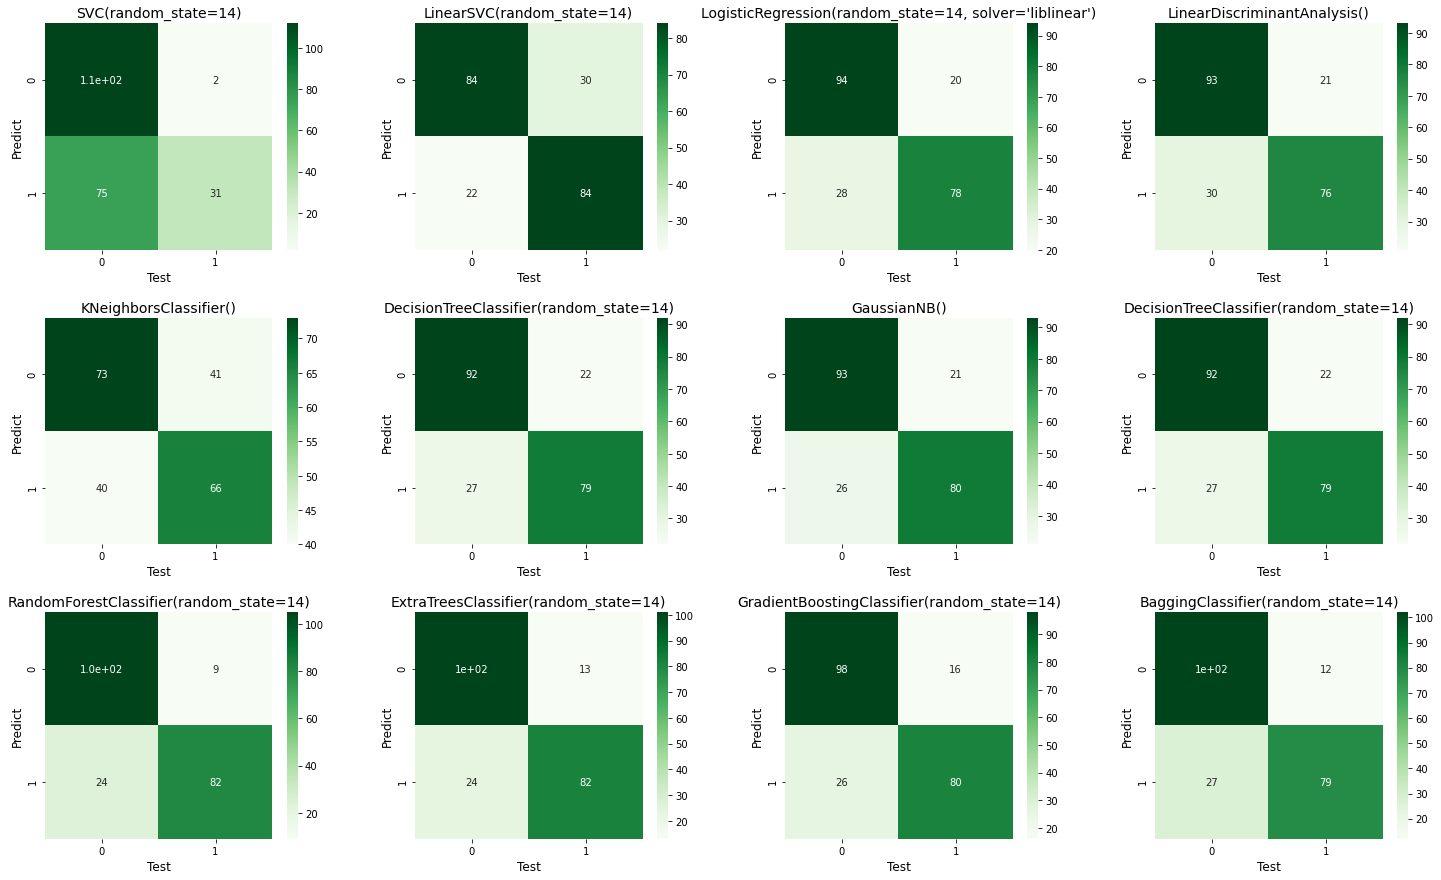

In [24]:
# Sort results df for later visualizations    
best_models = train_all_models(models)
best_models = best_models.sort_values([1], ascending=False)

In [25]:
best_models

,0,1
8,RF,0.850000
9,ET,0.831818
11,BC,0.822727
10,GB,0.809091
6,NB,0.786364
2,LOGR,0.781818
5,CART,0.777273
7,DT,0.777273
3,LDA,0.768182
1,SVM,0.763636


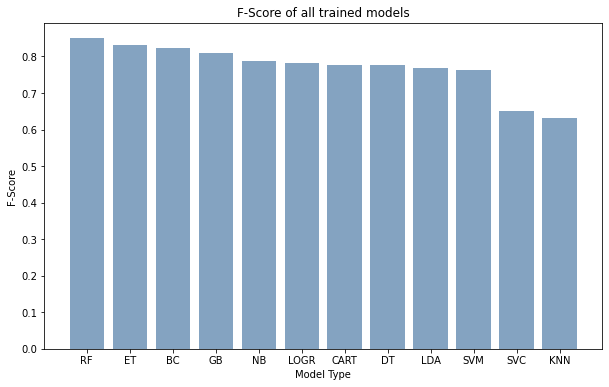

In [26]:
y_pos = np.arange(len(best_models[0]))
plt.figure(figsize=(10, 6))
plt.bar(y_pos, best_models[1], color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(y_pos, best_models[0])
plt.title('F-Score of all trained models')
plt.xlabel('Model Type')
plt.ylabel('F-Score')
plt.show()

##### Observations:
The best models are -  
1. RandomForestClassifier() - 85%
2. ExtraTreesClassifier() - 83%
3. GradientBoostingClassifier() - 80%

### Hyperparameter Tuning of best 3 models

In [27]:
# Take top 3 models and define new -> for randomized search cv
top3_RF = RandomForestClassifier()
top3_ET = ExtraTreesClassifier()
top3_GB = GradientBoostingClassifier()

top3_RF.fit(x_train, y_train)
top3_ET.fit(x_train, y_train)
top3_GB.fit(x_train, y_train)

GradientBoostingClassifier()

In [28]:
from sklearn.model_selection import RandomizedSearchCV

# Grid Search for RandomForestClassifier
grid_param_RF = {
    "n_estimators": randint(low=1, high=100),
    "max_depth": randint(low=10, high=100),
    "max_features": randint(low=1, high=4)
}

RF_grid_search = RandomizedSearchCV(estimator=top3_RF, param_distributions=grid_param_RF, cv= 10, verbose=1, random_state=14)
RF_grid_search.fit(x_train, y_train)

RF_best_grid = RF_grid_search.best_estimator_
print(RF_best_grid)
print(RF_grid_search.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
RandomForestClassifier(max_depth=36, max_features=2, n_estimators=88)
0.8235240334378264


In [29]:
# Grid Search for ExtraTreesClassifier
grid_param_ET = {
    "n_estimators": randint(low=1, high=100),
    "max_depth": randint(low=10, high=100),
    "max_features": randint(low=1, high=4)
}

ET_grid_search = RandomizedSearchCV(estimator=top3_ET, param_distributions=grid_param_ET, cv= 10, verbose=1, random_state=14)
ET_grid_search.fit(x_train, y_train)

ET_best_grid = ET_grid_search.best_estimator_

print(ET_best_grid)
print(ET_grid_search.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
ExtraTreesClassifier(max_depth=36, max_features=2, n_estimators=88)
0.8064393939393939


In [30]:
# Grid Search for GradientBoostingClassifier
grid_param_GB = {
    "n_estimators": randint(low=1, high=100),
    "max_depth": randint(low=10, high=100),
    "max_features": randint(low=1, high=4)
}

GB_grid_search = RandomizedSearchCV(estimator=top3_GB, param_distributions=grid_param_GB, cv= 10, verbose=1, random_state=14)
GB_grid_search.fit(x_train, y_train)

GB_best_grid = GB_grid_search.best_estimator_

print(GB_best_grid)
print(GB_grid_search.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
GradientBoostingClassifier(max_depth=42, max_features=1, n_estimators=78)
0.8144200626959247


In [31]:
# Show results of grid search
print(RF_best_grid, "\n Score: ", RF_grid_search.best_score_, "\n ------------------------------------")
print(ET_best_grid, "\n Score: ", ET_grid_search.best_score_, "\n ------------------------------------")
print(GB_best_grid, "\n Score: ", GB_grid_search.best_score_, "\n ------------------------------------")

RandomForestClassifier(max_depth=36, max_features=2, n_estimators=88) 
 Score:  0.8235240334378264 
 ------------------------------------
ExtraTreesClassifier(max_depth=36, max_features=2, n_estimators=88) 
 Score:  0.8064393939393939 
 ------------------------------------
GradientBoostingClassifier(max_depth=42, max_features=1, n_estimators=78) 
 Score:  0.8144200626959247 
 ------------------------------------


# Taking best Model and train it again with best Hyperparameters

In [32]:
# RandomForestClassifier is best one, create model and learn again with defined parameters of grid search
best_model = RandomForestClassifier(max_depth=20, max_features=1, n_estimators=62)
best_model.fit(x_train, y_train)
pred = best_model.predict(x_test)

print(f"Classification report\n {classification_report(pred, y_test)}")
print(f"Score = {best_model.score(x_test,y_test)}")

Classification report
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       123
           1       0.78      0.86      0.82        97

    accuracy                           0.83       220
   macro avg       0.83      0.83      0.83       220
weighted avg       0.84      0.83      0.83       220

Score = 0.8318181818181818


## Saving Model

In [33]:
import joblib
joblib.dump(best_model,'Titanic.pkl')

['Titanic.pkl']

Finally, the model is saved as Titanic.pkl for further use and prediction